In [1]:
#读入数据
import pandas as pd
import numpy as np
data = pd.read_excel(r"326312325_按序号_决策与价值判断调查_150_106.xlsx")

In [2]:
# 筛选注意力题回答异常的样本并且只保留分析需要的列
data = data[data["10、G．	这题请选1"] == 1]
data = data[data["2、您的年龄段："] != 10]

In [3]:
print(data)

      序号              提交答卷时间  所用时间    来源  来源详情                     来自IP   总分  \
0      2   2025/8/12 2:18:57  176秒  手机提交  直接访问   115.216.234.125(浙江-台州)  214   
1      3   2025/8/12 7:13:14  297秒  手机提交  直接访问   183.238.129.122(广东-东莞)  397   
2      4   2025/8/12 7:48:22  273秒  手机提交  直接访问    223.104.159.64(浙江-绍兴)  334   
3      5  2025/8/12 10:10:30  218秒  手机提交  直接访问    112.224.141.97(山东-济南)  477   
4      6  2025/8/12 10:12:22  167秒  手机提交  直接访问   223.104.101.121(河北-唐山)  571   
..   ...                 ...   ...   ...   ...                      ...  ...   
101  146  2025/8/15 13:23:08  137秒    微信   NaN    223.79.206.171(山东-潍坊)  522   
102  147  2025/8/15 13:29:25  198秒    微信   NaN     60.15.187.53(黑龙江-绥化)  437   
103  148  2025/8/15 13:37:41  153秒    微信   NaN      111.34.3.240(山东-德州)  429   
104  149  2025/8/15 13:43:52  195秒    微信   NaN  111.43.202.182(黑龙江-哈尔滨)  505   
105  150  2025/8/15 13:50:31  182秒    微信   NaN    112.10.221.250(浙江-杭州)  496   

     1、您的性别：  2、您的年龄段：  3、你能在多大水平上承担选择可

In [4]:
# def normalize(df, columns_to_normalize):
#     for col in columns_to_normalize:
#         min_val = df[col].min()
#         max_val = df[col].max()
#         df[col] = df[col].apply(lambda x: (x - min_val) / (max_val - min_val))
#     return df

In [5]:
#每种行为对应的问题被解决的概率
s_1 = data["7、假设你做出了以下选择，你认为问题被解决的概率有多大，请填写0-100之间的数值—直接举报"] / 100
s_2 = data["7、匿名举报"] / 100
s_3 = data["7、继续保持观察，等待时机或者搜集更多证据后再采取行动"] / 100
s_4 = data["7、保持沉默，等待第三方想办法解决问题"] / 100
#每种行为对应的主观上对承受难以承受的代价的概率评估
c_1 = data["8、假设你做出了以下选择，你认为你有多大概率会承受难以承受的损失，请填写0-100之间的数值—直接举报"] / 100
c_2 = data["8、匿名举报"] / 100
c_3 = data["8、继续保持观察，等待时机或者搜集更多证据后再采取行动"] / 100
c_4 = data["8、保持沉默，等待第三方想办法解决问题"] / 100

df_s_c = pd.DataFrame({"s_1": s_1, "s_2": s_2, "s_3": s_3, "s_4": s_4, "c_1": c_1, "c_2": c_2, "c_3": c_3, "c_4": c_4})

# df_s_c = normalize(df_s_c, ['s_1', 's_2', 's_3', 's_4', 'c_1', 'c_2', 'c_3', 'c_4'])

In [6]:
#每一种行为和每一种后果的组合概率
# def cooperation_probability(s, c, i):
#     p = {}
#     p[f"{i}_1"] = s * c
#     p[f"{i}_2"] = s * (1 - c)
#     p[f"{i}_3"] = (1 - s) * c
#     p[f"{i}_4"] = (1 - s) * (1 - c)
#     print(f"p_{i} 的组合概率计算完成: {p}")
#     p = pd.DataFrame(p)
#     p.to_csv(f"p_{i}.csv", index=False)
#     return p[f"{i}_1"],p[f"{i}_2"],p[f"{i}_3"],p[f"{i}_4"]

# cooperation_probability(df_s_c['s_1'], df_s_c['c_1'], 1)
# cooperation_probability(df_s_c['s_2'], df_s_c['c_2'], 2)
# cooperation_probability(df_s_c['s_3'], df_s_c['c_3'], 3)
# cooperation_probability(df_s_c['s_4'], df_s_c['c_4'], 4)

def add_prob_columns(df_s_c, s_col, c_col, i):
    s = df_s_c[s_col]
    c = df_s_c[c_col]
    df_s_c[f'p{i}_1'] = s * c                  # 成功 & 代价
    df_s_c[f'p{i}_2'] = s * (1 - c)            # 成功 & 无代价
    df_s_c[f'p{i}_3'] = (1 - s) * c            # 失败 & 代价
    df_s_c[f'p{i}_4'] = (1 - s) * (1 - c)      # 失败 & 无代价

add_prob_columns(df_s_c, 's_1', 'c_1', 1)
add_prob_columns(df_s_c, 's_2', 'c_2', 2)
add_prob_columns(df_s_c, 's_3', 'c_3', 3)
add_prob_columns(df_s_c, 's_4', 'c_4', 4)
print(df_s_c)

      s_1   s_2   s_3   s_4   c_1   c_2   c_3   c_4    p1_1    p1_2  ...  \
0    0.32  0.05  0.31  0.00  0.60  0.05  0.00  0.00  0.1920  0.1280  ...   
1    0.30  0.60  0.64  0.10  0.81  0.41  0.20  0.01  0.2430  0.0570  ...   
2    0.00  0.20  0.60  0.10  0.80  0.50  0.20  0.00  0.0000  0.0000  ...   
3    0.39  0.30  0.50  0.70  0.75  0.74  0.40  0.20  0.2925  0.0975  ...   
4    0.55  1.00  0.69  0.20  1.00  0.50  0.24  0.16  0.5500  0.0000  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...     ...     ...  ...   
101  0.63  0.61  0.32  0.23  0.73  0.74  0.38  0.08  0.4599  0.1701  ...   
102  0.49  0.38  0.25  0.12  0.77  0.43  0.20  0.22  0.3773  0.1127  ...   
103  0.44  0.44  0.28  0.09  0.79  0.43  0.24  0.12  0.3476  0.0924  ...   
104  0.50  0.51  0.10  0.02  0.91  0.74  0.35  0.30  0.4550  0.0450  ...   
105  0.58  0.55  0.39  0.19  0.65  0.64  0.40  0.09  0.3770  0.2030  ...   

       p2_3    p2_4    p3_1    p3_2    p3_3    p3_4    p4_1    p4_2    p4_3  \
0    0.0

In [7]:
# #主观风险敏感度α
# alpha = data["3、你能在多大水平上承担选择可能带来的风险？"] / 5
# #风险敏感的影响λ1
# lambda1 = data["4、你在做决策时，对风险的考虑在多大程度上影响你的决定？"]  / 5
# #对收益波动性的看法的影响λ2
# lambda2 = data["5、你在做决策时，多大程度上在意收益是否稳定？"]  / 5

# df_alpha_lambda = pd.DataFrame({"alpha": alpha, "lambda1": lambda1, "lambda2": lambda2})

# # df_alpha_lambda = normalize(df_alpha_lambda, ['alpha', 'lambda1', 'lambda2'])
alpha_raw   = data["3、你能在多大水平上承担选择可能带来的风险？"]
lambda1_raw = data["4、你在做决策时，对风险的考虑在多大程度上影响你的决定？"]
# lambda2_raw = data["5、你在做决策时，多大程度上在意收益是否稳定？"]

alpha   = (alpha_raw + 1) / 6
lambda1 = (lambda1_raw + 1) / 6
# lambda2 = (lambda2_raw) / 5.0

# df_alpha_lambda = pd.DataFrame({"alpha": alpha, "lambda1": lambda1, "lambda2": lambda2})

df_alpha_lambda = pd.DataFrame({"alpha": alpha, "lambda1": lambda1})

# df_alpha_lambd = normalize(df_alpha_lambda, ['alpha', 'lambda1'])

In [8]:
#用分数阶熵结算行为带来的总体不确定性
import numpy as np
import pandas as pd

def fractional_entropy(df_probs, alpha):
    eps = 1e-12
    def H_for(cols):
        P = df_probs[cols].clip(lower=eps, upper=1.0)
        return (P * (-np.log(P)) ** alpha.values[:, None]).sum(axis=1)

    H = pd.DataFrame({
        'H_alpha_1': H_for(['p1_1','p1_2','p1_3','p1_4']),
        'H_alpha_2': H_for(['p2_1','p2_2','p2_3','p2_4']),
        'H_alpha_3': H_for(['p3_1','p3_2','p3_3','p3_4']),
        'H_alpha_4': H_for(['p4_1','p4_2','p4_3','p4_4']),
    }, index=df_probs.index)
    return H

H_alpha_df = fractional_entropy(df_s_c, df_alpha_lambda['alpha'])
print(H_alpha_df.head())

   H_alpha_1  H_alpha_2  H_alpha_3     H_alpha_4
0   1.236208   0.386843   0.655664  4.767441e-11
1   1.022154   1.216110   1.069240  4.132551e-01
2   0.500402   1.193550   1.173414  3.250830e-01
3   1.127576   1.088594   1.228383  1.032899e+00
4   0.731306   0.736808   1.119324  9.066295e-01


In [9]:
#综合权衡指数计算
#公平价值F_v
F_1 = data["9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．	相关人的行为损害了社会公正"]
F_2 = data["9、B．	有些人没有得到他们应得的"]
F_3 = data["9、C．	不公正战胜了公正"]
F_4 = data["9、D．	遭受了不公正的人没有得到补偿"]
# F_5 = data["9、E．	案例中的不公正是偶然的，而不是必然"] #已经在问卷验证过程就被删除
F_6 = data["9、F．	相关人员做决定时没有力求公正"]

F_v = F_1 + F_2 + F_3 + F_4 + F_6

#忠诚成本Lc
L_1 = data["10、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．	举报同事或朋友是一种对关系的背叛"]
L_2 = data["10、B．	即使举报是正确的，也会削弱我对团队的忠诚感"]
L_3 = data["10、C．	举报行为会被视为对团队利益的损害"]
L_4 = data["10、D．	考虑到我和朋友、同事的关系，我会犹豫是否继续举报"]
L_5 = data["10、E．	即使有不当行为，我仍会优先维护与团队的关系"]
L_6 = data["10、F．	举报会让我感觉自己不再完全属于这个群体"]

L_c = L_1 + L_2 + L_3 + L_4 + L_5 + L_6

#每一种行为对应的感知收益
P_1_1 = data["11、假设你即将要采取直接举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_1_2 = data["11、B.	这会给我带来职业晋升机会"]
P_1_3 = data["11、C.	这会使我获得满意的经济等物质奖励"]
P_1_4 = data["11、D.	这会让我觉得我在做正确的事情"]
P_1_5 = data["11、E.	这会使我获得心理上的满足或者释怀"]

P_1p = P_1_1 + P_1_2 + P_1_3 + P_1_4 + P_1_5

P_2_1 = data["12、假设你即将要采取匿名举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_2_2 = data["12、B.	这会给我带来职业晋升机会"]
P_2_3 = data["12、C.	这会使我获得满意的经济等物质奖励"]
P_2_4 = data["12、D.	这会让我觉得我在做正确的事情"]
P_2_5 = data["12、E.	这会使我获得心理上的满足或者释怀"]

P_2p = P_2_1 + P_2_2 + P_2_3 + P_2_4 + P_2_5

P_3_1 = data["13、假设你即将要采取继续保持观察，等待时机或者搜集更多证据后再采取行动的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_3_2 = data["13、B.	这会给我带来职业晋升机会"]
P_3_3 = data["13、C.	这会使我获得满意的经济等物质奖励"]
P_3_4 = data["13、D.	这会让我觉得我在做正确的事情"]
P_3_5 = data["13、E.	这会使我获得心理上的满足或者释怀"]

P_3p = P_3_1 + P_3_2 + P_3_3 + P_3_4 + P_3_5

P_4_1 = data["14、假设你即将要采取保持沉默，等待第三方想办法解决问题的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_4_2 = data["14、B.	这会给我带来职业晋升机会"]
P_4_3 = data["14、C.	这会使我获得满意的经济等物质奖励"]
P_4_4 = data["14、D.	这会让我觉得我在做正确的事情"]
P_4_5 = data["14、E.	这会使我获得心理上的满足或者释怀"]

P_4p = P_4_1 + P_4_2 + P_4_3 + P_4_4 + P_4_5

# ci_cal = pd.DataFrame({"F_v": F_v, "L_c": L_c, "P_1p": P_1p, "P_2p": P_2p, "P_3p": P_3p, "P_4p": P_4p})

# ci_cal = normalize(ci_cal,["F_v","L_c","P_1p","P_2p","P_3p","P_4p"])

#每一种行为的效用ci
# C1 = F_v - L_c + P_1p
# C2 = F_v - L_c + P_2p
# C3 = F_v - L_c + P_3p
# C4 = F_v - L_c + P_4p

C1 = (F_v * P_1p) / L_c
C2 = (F_v * P_2p) / L_c
C3 = (F_v * P_3p) / L_c
C4 = (F_v * P_4p) / L_c

df_ci = pd.DataFrame({"C1": C1, "C2": C2, "C3": C3, "C4": C4})

# df_ci = normalize(df_ci,["C1","C2","C3","C4"])

# eps = 1e-12
# df_ci = df_ci.replace(0, eps)

#为计算效用函数做准备
data2 = pd.concat([data, df_alpha_lambda, df_ci], axis=1)
print(data2)


      序号              提交答卷时间  所用时间    来源  来源详情                     来自IP   总分  \
0      2   2025/8/12 2:18:57  176秒  手机提交  直接访问   115.216.234.125(浙江-台州)  214   
1      3   2025/8/12 7:13:14  297秒  手机提交  直接访问   183.238.129.122(广东-东莞)  397   
2      4   2025/8/12 7:48:22  273秒  手机提交  直接访问    223.104.159.64(浙江-绍兴)  334   
3      5  2025/8/12 10:10:30  218秒  手机提交  直接访问    112.224.141.97(山东-济南)  477   
4      6  2025/8/12 10:12:22  167秒  手机提交  直接访问   223.104.101.121(河北-唐山)  571   
..   ...                 ...   ...   ...   ...                      ...  ...   
101  146  2025/8/15 13:23:08  137秒    微信   NaN    223.79.206.171(山东-潍坊)  522   
102  147  2025/8/15 13:29:25  198秒    微信   NaN     60.15.187.53(黑龙江-绥化)  437   
103  148  2025/8/15 13:37:41  153秒    微信   NaN      111.34.3.240(山东-德州)  429   
104  149  2025/8/15 13:43:52  195秒    微信   NaN  111.43.202.182(黑龙江-哈尔滨)  505   
105  150  2025/8/15 13:50:31  182秒    微信   NaN    112.10.221.250(浙江-杭州)  496   

     1、您的性别：  2、您的年龄段：  3、你能在多大水平上承担选择可

In [10]:
#计算效用函数
import numpy as np

for i, col in enumerate(['C1', 'C2', 'C3', 'C4'], start=1):
    U_col = f"U{i}"
    data2[U_col] = np.where(
        data2['alpha'] == 0.5, data2[col],
        np.where(
            data2['alpha'] < 0.5, np.log(data2[col]),
            np.sqrt(data2[col])
        )
    )
#     data2[U_col] = np.where(
#         data2['alpha'] == 0.5, data2[col],
#         np.where(
#             data2['alpha'] < 0.5, np.log(data2[col]),
#             np.sqrt(data2[col])
#         )
#     )

print(data2)

data3 = pd.concat([data2, H_alpha_df], axis=1)
print(data3)

      序号              提交答卷时间  所用时间    来源  来源详情                     来自IP   总分  \
0      2   2025/8/12 2:18:57  176秒  手机提交  直接访问   115.216.234.125(浙江-台州)  214   
1      3   2025/8/12 7:13:14  297秒  手机提交  直接访问   183.238.129.122(广东-东莞)  397   
2      4   2025/8/12 7:48:22  273秒  手机提交  直接访问    223.104.159.64(浙江-绍兴)  334   
3      5  2025/8/12 10:10:30  218秒  手机提交  直接访问    112.224.141.97(山东-济南)  477   
4      6  2025/8/12 10:12:22  167秒  手机提交  直接访问   223.104.101.121(河北-唐山)  571   
..   ...                 ...   ...   ...   ...                      ...  ...   
101  146  2025/8/15 13:23:08  137秒    微信   NaN    223.79.206.171(山东-潍坊)  522   
102  147  2025/8/15 13:29:25  198秒    微信   NaN     60.15.187.53(黑龙江-绥化)  437   
103  148  2025/8/15 13:37:41  153秒    微信   NaN      111.34.3.240(山东-德州)  429   
104  149  2025/8/15 13:43:52  195秒    微信   NaN  111.43.202.182(黑龙江-哈尔滨)  505   
105  150  2025/8/15 13:50:31  182秒    微信   NaN    112.10.221.250(浙江-杭州)  496   

     1、您的性别：  2、您的年龄段：  3、你能在多大水平上承担选择可

In [11]:
#每一种行为对应后果的效用

# U1 = data3["U1"]
# U2 = data3["U2"]
# U3 = data3["U3"]
# U4 = data3["U4"]

# p1_1 = df_s_c["p1_1"]
# p1_2 = df_s_c["p1_2"]
# p1_3 = df_s_c["p1_3"]
# p1_4 = df_s_c["p1_4"]

# p2_1 = df_s_c["p2_1"]
# p2_2 = df_s_c["p2_2"]
# p2_3 = df_s_c["p2_3"]
# p2_4 = df_s_c["p2_4"]

# p3_1 = df_s_c["p1_1"]
# p3_2 = df_s_c["p1_2"]
# p3_3 = df_s_c["p1_3"]
# p3_4 = df_s_c["p1_4"]

# p4_1 = df_s_c["p1_1"]
# p4_2 = df_s_c["p1_2"]
# p4_3 = df_s_c["p1_3"]
# p4_4 = df_s_c["p1_4"]

# #公式右边的U_i(X(Action)+大写fai)
# U1_1 = U1 - 1.37
# U1_2 = U1 + 3.13
# U1_3 = U1 + 1.37
# U1_4 = U1 - 3.13

# U2_1 = U2 - 1.37
# U2_2 = U2 + 3.13
# U2_3 = U2 + 1.37
# U2_4 = U2 - 3.13

# U3_1 = U3 - 1.37
# U3_2 = U3 + 3.13
# U3_3 = U3 + 1.37
# U3_4 = U3 - 3.13

# U4_1 = U4 - 1.37
# U4_2 = U4 + 3.13
# U4_3 = U4 + 1.37
# U4_4 = U4 - 3.13

# eps = 1e-12

# #公式左边的分数阶熵
# H_U1_1 = (-np.log(p1_1)) ** df_alpha_lambda['alpha']
# H_U1_2 = (-np.log(p1_2)) ** df_alpha_lambda['alpha']
# H_U1_3 = (-np.log(p1_3)) ** df_alpha_lambda['alpha']
# H_U1_4 = (-np.log(p1_4)) ** df_alpha_lambda['alpha']

# H_U2_1 = (-np.log(p2_1)) ** df_alpha_lambda['alpha']
# H_U2_2 = (-np.log(p2_2)) ** df_alpha_lambda['alpha']
# H_U2_3 = (-np.log(p2_3)) ** df_alpha_lambda['alpha']
# H_U2_4 = (-np.log(p2_4)) ** df_alpha_lambda['alpha']

# H_U3_1 = (-np.log(p3_1)) ** df_alpha_lambda['alpha']
# H_U3_2 = (-np.log(p3_2)) ** df_alpha_lambda['alpha']
# H_U3_3 = (-np.log(p3_3)) ** df_alpha_lambda['alpha']
# H_U3_4 = (-np.log(p3_4)) ** df_alpha_lambda['alpha']

# H_U4_1 = (-np.log(p4_1)) ** df_alpha_lambda['alpha']
# H_U4_2 = (-np.log(p4_2)) ** df_alpha_lambda['alpha']
# H_U4_3 = (-np.log(p4_3)) ** df_alpha_lambda['alpha']
# H_U4_4 = (-np.log(p4_4)) ** df_alpha_lambda['alpha']

# #组合公式两个部分，获得每个行为的每个结果对应的效用
# u_x_a_1 = pd.DataFrame({"u_x_a_1_1": U1_1 * H_U1_1, "u_x_a_1_2": U1_2 * H_U1_2, "u_x_a_1_3": U1_3 * H_U1_3, "u_x_a_1_4": U1_4 * H_U1_4})
# u_x_a_2 = pd.DataFrame({"u_x_a_2_1": U2_1 * H_U2_1, "u_x_a_2_2": U2_2 * H_U2_2, "u_x_a_2_3": U2_3 * H_U2_3, "u_x_a_2_4": U2_4 * H_U2_4})
# u_x_a_3 = pd.DataFrame({"u_x_a_3_1": U3_1 * H_U3_1, "u_x_a_3_2": U3_2 * H_U3_2, "u_x_a_3_3": U3_3 * H_U3_3, "u_x_a_3_4": U3_4 * H_U3_4})
# u_x_a_4 = pd.DataFrame({"u_x_a_4_1": U4_1 * H_U4_1, "u_x_a_4_2": U4_2 * H_U4_2, "u_x_a_4_3": U4_3 * H_U4_3, "u_x_a_4_4": U4_4 * H_U4_4})
# data3 = pd.concat([data3, u_x_a_1, u_x_a_2, u_x_a_3, u_x_a_4], axis=1)
# print(u_x_a_1)

In [12]:
import numpy as np
import pandas as pd

# 设置最小值eps
eps = 1e-12

# 用一个字典保存所有的概率数据
probability_dict = {
    'p1': df_s_c[['p1_1', 'p1_2', 'p1_3', 'p1_4']],
    'p2': df_s_c[['p2_1', 'p2_2', 'p2_3', 'p2_4']],
    'p3': df_s_c[['p3_1', 'p3_2', 'p3_3', 'p3_4']],
    'p4': df_s_c[['p4_1', 'p4_2', 'p4_3', 'p4_4']]
}

# 用一个字典保存所有效用数据
utility_dict = {
    'U1': data3["U1"],
    'U2': data3["U2"],
    'U3': data3["U3"],
    'U4': data3["U4"]
}

# 用一个字典保存每个行为的效用变动
delta_U = {}
for i in range(1, 5):
    delta_U[f'U{i}_1'] = -1.37
    delta_U[f'U{i}_2'] = 3.13
    delta_U[f'U{i}_3'] = 1.37
    delta_U[f'U{i}_4'] = -3.13

# 处理效用和熵的计算
u_x_a = {}

# 遍历每个行为
for i in range(1, 5):
    U = utility_dict[f'U{i}']
    p = probability_dict[f'p{i}']
    
    # 计算效用变动
    U_variants = [U + delta_U[f'U{i}_{j}'] for j in range(1, 5)]
    
    # 计算熵
    H_variants = [(-np.log(p[f'p{i}_{j}'].clip(lower=eps))) ** df_alpha_lambda['alpha'] for j in range(1, 5)]
    
    # 组合效用与熵
    u_x_a[i] = pd.DataFrame({
        f'u_x_a_{i}_{j}': U_variants[j-1] * H_variants[j-1] for j in range(1, 5)
    })

# 合并到data3
data3 = pd.concat([data3] + [u_x_a[i] for i in range(1, 5)], axis=1)

# 打印结果
print(u_x_a[1])
print(u_x_a[2])


     u_x_a_1_1   u_x_a_1_2  u_x_a_1_3  u_x_a_1_4
0     2.346151   11.021347   3.912486  -0.267283
1     2.258640   12.691931   3.106281   0.051534
2    73.529708  197.869303   1.205227   1.450311
3     1.845461   10.728899   3.690661  -0.231306
4     1.929205  118.579375   4.726937  19.098764
..         ...         ...        ...        ...
101   0.857539    8.073705   4.493078  -1.299714
102   2.965444   14.431458   5.453753   2.395843
103   3.251816   15.674843   4.932241   2.537378
104   2.498847   19.386931   4.744141   3.311229
105   1.849179    8.707884   5.498214   0.185202

[101 rows x 4 columns]
     u_x_a_2_1  u_x_a_2_2  u_x_a_2_3  u_x_a_2_4
0     3.420440  13.334881   8.880958  -0.148531
1     2.042242   6.286176   6.485288  -0.166076
2     4.986326  15.347959   4.494895   0.371587
3     1.588049  10.659072   2.986947  -0.785741
4     1.956707   5.272345  85.744866  14.233245
..         ...        ...        ...        ...
101   2.844748  11.738703   6.997428   2.698388
102 

In [13]:
#决策分数计算模块
import numpy as np
import pandas as pd

#公式右边
#先计算每个行为及其对应后果的期望效用
data3['E_U_1'] = sum(u_x_a[1][f"u_x_a_1_{i}"] * df_s_c[f"p1_{i}"] for i in range(1, 5))
data3['E_U_2'] = sum(u_x_a[2][f"u_x_a_2_{i}"] * df_s_c[f"p2_{i}"] for i in range(1, 5))
data3['E_U_3'] = sum(u_x_a[3][f"u_x_a_3_{i}"] * df_s_c[f"p3_{i}"] for i in range(1, 5))
data3['E_U_4'] = sum(u_x_a[4][f"u_x_a_4_{i}"] * df_s_c[f"p4_{i}"] for i in range(1, 5))

# 最大期望值
data3['max_EU'] = data3[['E_U_1', 'E_U_2', 'E_U_3', 'E_U_4']].max(axis=1)

# 输出结果
print(data3[['E_U_1', 'E_U_2', 'E_U_3', 'E_U_4', 'max_EU']])

#公式左边
#每个行为后果概率分布的方差
df_s_c[['p1_1', 'p1_2', 'p1_3', 'p1_4']] = df_s_c[['p1_1', 'p1_2', 'p1_3', 'p1_4']].apply(pd.to_numeric, errors='coerce')
df_s_c[['p2_1', 'p2_2', 'p2_3', 'p2_4']] = df_s_c[['p2_1', 'p2_2', 'p2_3', 'p2_4']].apply(pd.to_numeric, errors='coerce')
df_s_c[['p3_1', 'p3_2', 'p3_3', 'p3_4']] = df_s_c[['p3_1', 'p3_2', 'p3_3', 'p3_4']].apply(pd.to_numeric, errors='coerce')
df_s_c[['p4_1', 'p4_2', 'p4_3', 'p4_4']] = df_s_c[['p4_1', 'p4_2', 'p4_3', 'p4_4']].apply(pd.to_numeric, errors='coerce')

data3['var_x_a_1'] = df_s_c[['p1_1', 'p1_2', 'p1_3', 'p1_4']].var(axis=1)
data3['var_x_a_2'] = df_s_c[['p2_1', 'p2_2', 'p2_3', 'p2_4']].var(axis=1)
data3['var_x_a_3'] = df_s_c[['p3_1', 'p3_2', 'p3_3', 'p3_4']].var(axis=1)
data3['var_x_a_4'] = df_s_c[['p4_1', 'p4_2', 'p4_3', 'p4_4']].var(axis=1)

#最大方差
data3['max_EU_var'] = data3[['var_x_a_1', 'var_x_a_2', 'var_x_a_3', 'var_x_a_4']].max(axis=1)

print(data3[['var_x_a_1', 'var_x_a_2', 'var_x_a_3', 'var_x_a_4', 'max_EU_var']])

#把公式组装起来
data3["R1"] = (data3['lambda1'] / 2) * (data3["H_alpha_1"] + (data3['var_x_a_1'] / data3['max_EU_var'])) - (1 - data3['lambda1']) * (data3['E_U_1'] / data3['max_EU'])
data3["R2"] = (data3['lambda1'] / 2) * (data3["H_alpha_2"] + (data3['var_x_a_2'] / data3['max_EU_var'])) - (1 - data3['lambda1']) * (data3['E_U_2'] / data3['max_EU'])
data3["R3"] = (data3['lambda1'] / 2) * (data3["H_alpha_3"] + (data3['var_x_a_3'] / data3['max_EU_var'])) - (1 - data3['lambda1']) * (data3['E_U_3'] / data3['max_EU'])
data3["R4"] = (data3['lambda1'] / 2) * (data3["H_alpha_4"] + (data3['var_x_a_4'] / data3['max_EU_var'])) - (1 - data3['lambda1']) * (data3['E_U_4'] / data3['max_EU'])



        E_U_1     E_U_2     E_U_3     E_U_4    max_EU
0    3.384787  0.929754  1.564206  0.000000  3.384787
1    3.040405  3.752091  3.295439  1.150264  3.752091
2    1.254244  3.980021  4.038352  1.236616  4.038352
3    3.239068  2.588188  3.339598  2.115041  3.339598
4    3.188184  3.614526  3.996783  3.092569  3.996783
..        ...       ...       ...       ...       ...
101  2.851458  5.438952  5.203710  3.650568  5.438952
102  5.168009  5.540850  3.466732  3.910279  5.540850
103  5.059106  3.384704  5.112623  3.156033  5.112623
104  4.316977  5.241879  3.932122  2.895597  5.241879
105  3.993078  4.140308  3.665578  2.114188  4.140308

[101 rows x 5 columns]
     var_x_a_1  var_x_a_2  var_x_a_3  var_x_a_4  max_EU_var
0     0.014565   0.189675   0.107400   0.250000    0.250000
1     0.050492   0.006141   0.038885   0.184588    0.184588
2     0.143333   0.030000   0.034533   0.190000    0.190000
3     0.025875   0.035605   0.003333   0.048133    0.048133
4     0.085000   0.083333   

In [14]:
# 找到每行最小的值所在的列索引
decision = data3[['R1', 'R2', 'R3', 'R4']].apply(lambda row: row.idxmin(), axis=1)

# 将决策结果赋值为1、2、3、4
data3['best_action'] = decision.map({'R1': 1, 'R2': 2, 'R3': 3, 'R4': 4})

# 输出最终决策
print(data3[['R1', 'R2', 'R3', 'R4', 'best_action']])

           R1        R2        R3        R4  best_action
0    0.098157  0.290286  0.207712  0.333333          1.0
1    0.404818  0.353908  0.386910  0.537762          2.0
2    0.627394  0.675722  0.677584  0.662541          1.0
3    0.532161  0.632632  0.374014  0.741488          3.0
4    0.865653  0.858600  0.782136  0.938052          3.0
..        ...       ...       ...       ...          ...
101  0.487237  0.406876  0.396190  0.638299          3.0
102  0.448863  0.396428  0.592991  0.659906          2.0
103  0.683225  0.659338  0.705132  0.825205          2.0
104  0.233451  0.131716  0.280022  0.390028          2.0
105  0.644649  0.638955  0.639349  0.883827          2.0

[101 rows x 5 columns]


In [15]:
#真实最终选择
final_choice = data["15、你最后会选择怎么办？"]
data3["final_choice"] = final_choice

print(data3)
data3.to_csv(f"data3.csv", index=False)

      序号              提交答卷时间  所用时间    来源  来源详情                     来自IP   总分  \
0      2   2025/8/12 2:18:57  176秒  手机提交  直接访问   115.216.234.125(浙江-台州)  214   
1      3   2025/8/12 7:13:14  297秒  手机提交  直接访问   183.238.129.122(广东-东莞)  397   
2      4   2025/8/12 7:48:22  273秒  手机提交  直接访问    223.104.159.64(浙江-绍兴)  334   
3      5  2025/8/12 10:10:30  218秒  手机提交  直接访问    112.224.141.97(山东-济南)  477   
4      6  2025/8/12 10:12:22  167秒  手机提交  直接访问   223.104.101.121(河北-唐山)  571   
..   ...                 ...   ...   ...   ...                      ...  ...   
101  146  2025/8/15 13:23:08  137秒    微信   NaN    223.79.206.171(山东-潍坊)  522   
102  147  2025/8/15 13:29:25  198秒    微信   NaN     60.15.187.53(黑龙江-绥化)  437   
103  148  2025/8/15 13:37:41  153秒    微信   NaN      111.34.3.240(山东-德州)  429   
104  149  2025/8/15 13:43:52  195秒    微信   NaN  111.43.202.182(黑龙江-哈尔滨)  505   
105  150  2025/8/15 13:50:31  182秒    微信   NaN    112.10.221.250(浙江-杭州)  496   

     1、您的性别：  2、您的年龄段：  3、你能在多大水平上承担选择可

In [16]:
import numpy as np
import pandas as pd

def _pick_from_row(row, base, k):
    if pd.isna(k):
        return np.nan
    try:
        k = int(k)
    except Exception:
        return np.nan
    if k not in (1, 2, 3, 4):
        return np.nan
    return row.get(f"{base}{k}", np.nan)

# —— 效用 U 对比 ——
data3['U_model'] = data3.apply(lambda r: _pick_from_row(r, 'E_U_', r['best_action']), axis=1)
data3['U_real']  = data3.apply(lambda r: _pick_from_row(r, 'E_U_', r['final_choice']), axis=1)
data3['DeltaU']  = data3['U_model'] - data3['U_real']

# —— 风险 H_alpha 对比 ——
data3['H_model'] = data3.apply(lambda r: _pick_from_row(r, 'H_alpha_', r['best_action']), axis=1)
data3['H_real']  = data3.apply(lambda r: _pick_from_row(r, 'H_alpha_', r['final_choice']), axis=1)
data3['DeltaH']  = data3['H_model'] - data3['H_real']

# 统计
accuracy = float((data3['best_action'] == data3['final_choice']).mean(skipna=True))

improve_rate = float((data3['DeltaU'] > 0).mean(skipna=True))
same_rate    = float((data3['DeltaU'] == 0).mean(skipna=True))
worse_rate   = float((data3['DeltaU'] < 0).mean(skipna=True))

H_lower_rate  = float((data3['DeltaH'] < 0).mean(skipna=True))   # 模型风险更低
H_equal_rate  = float((data3['DeltaH'] == 0).mean(skipna=True))  # 风险相同
H_higher_rate = float((data3['DeltaH'] > 0).mean(skipna=True))   # 模型风险更高

# 输出
print("—— 效用 U 对比 ——")
print("模型可提升效用的比例：", improve_rate)
print("效用不变的比例：",       same_rate)
print("效用下降的比例：",       worse_rate)
print("模型与现实选择一致性：", accuracy)

print("\n—— 风险 H_alpha 对比 ——")
print("模型建议风险更低的比例：", H_lower_rate)
print("风险不变的比例：",         H_equal_rate)
print("模型建议风险更高的比例：", H_higher_rate)


—— 效用 U 对比 ——
模型可提升效用的比例： 0.4752475247524752
效用不变的比例： 0.36633663366336633
效用下降的比例： 0.1485148514851485
模型与现实选择一致性： 0.36633663366336633

—— 风险 H_alpha 对比 ——
模型建议风险更低的比例： 0.07920792079207921
风险不变的比例： 0.36633663366336633
模型建议风险更高的比例： 0.5445544554455446



—— 混淆矩阵（计数）——
Pred   1   2   3  4
True               
1     11   1   1  2
2      6   6   8  1
3      7  21  19  1
4      2   5   8  1

—— 混淆矩阵（按真实标签归一化：行和=1，对应各类召回）——
Pred      1      2      3      4
True                            
1     0.733  0.067  0.067  0.133
2     0.286  0.286  0.381  0.048
3     0.146  0.438  0.396  0.021
4     0.125  0.312  0.500  0.062

—— 混淆矩阵（按预测标签归一化：列和=1，对应各类精度）——
Pred      1      2      3    4
True                          
1     0.423  0.030  0.028  0.4
2     0.231  0.182  0.222  0.2
3     0.269  0.636  0.528  0.2
4     0.077  0.152  0.222  0.2

—— 分类报告 ——
              support  precision  recall     f1
1                  15      0.423   0.733  0.537
2                  21      0.182   0.286  0.222
3                  48      0.528   0.396  0.452
4                  16      0.200   0.062  0.095
micro avg         100      0.370   0.370  0.370
macro avg         100      0.333   0.369  0.327
weighted avg      100      0.387   0.370  0.360


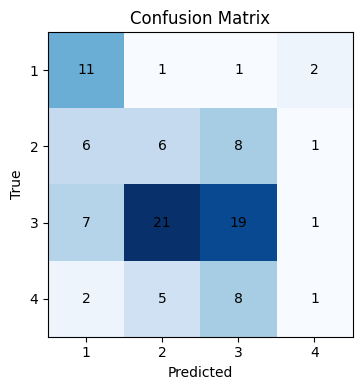

In [17]:
# —— 混淆矩阵与分类报告 —— 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 仅保留两列都非空的样本
valid_mask = data3['best_action'].notna() & data3['final_choice'].notna()
y_pred = data3.loc[valid_mask, 'best_action'].astype(int)
y_true = data3.loc[valid_mask, 'final_choice'].astype(int)

labels = [1, 2, 3, 4]  # 固定标签顺序，便于对齐

# 混淆矩阵（计数）
cm = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'], dropna=False)
cm = cm.reindex(index=labels, columns=labels, fill_value=0)  # 保证齐全

# 归一化版本
cm_recall = cm.div(cm.sum(axis=1).replace(0, np.nan), axis=0)   # 每行归一化：召回率视角
cm_prec   = cm.div(cm.sum(axis=0).replace(0, np.nan), axis=1)   # 每列归一化：精度视角

print("\n—— 混淆矩阵（计数）——")
print(cm)
print("\n—— 混淆矩阵（按真实标签归一化：行和=1，对应各类召回）——")
print(cm_recall.round(3))
print("\n—— 混淆矩阵（按预测标签归一化：列和=1，对应各类精度）——")
print(cm_prec.round(3))

# —— 每类 Precision / Recall / F1 —— 
tp = np.diag(cm.values)
fp = cm.sum(axis=0).values - tp
fn = cm.sum(axis=1).values - tp
tn = cm.values.sum() - (tp + fp + fn)

precision = tp / np.where((tp + fp) == 0, np.nan, (tp + fp))
recall    = tp / np.where((tp + fn) == 0, np.nan, (tp + fn))
f1        = 2 * precision * recall / np.where((precision + recall) == 0, np.nan, (precision + recall))

report = pd.DataFrame({
    'support': cm.sum(axis=1).values,
    'precision': np.round(precision, 3),
    'recall':    np.round(recall, 3),
    'f1':        np.round(f1, 3),
}, index=labels)

# 宏/微/加权
support = report['support'].values
support_total = support.sum()

# 微平均
micro_precision = tp.sum() / np.where((tp + fp).sum() == 0, np.nan, (tp + fp).sum())
micro_recall    = tp.sum() / np.where((tp + fn).sum() == 0, np.nan, (tp + fn).sum())
micro_f1        = 2 * micro_precision * micro_recall / np.where((micro_precision + micro_recall) == 0, np.nan, (micro_precision + micro_recall))

# 宏平均
macro_precision = np.nanmean(precision)
macro_recall    = np.nanmean(recall)
macro_f1        = np.nanmean(f1)

# 加权平均
weights = np.where(support_total == 0, np.nan, support / support_total)
weighted_precision = np.nansum(precision * weights)
weighted_recall    = np.nansum(recall * weights)
weighted_f1        = np.nansum(f1 * weights)

avg_rows = pd.DataFrame({
    'support': [support_total, support_total, support_total],
    'precision': [round(micro_precision, 3), round(macro_precision, 3), round(weighted_precision, 3)],
    'recall':    [round(micro_recall, 3),    round(macro_recall, 3),    round(weighted_recall, 3)],
    'f1':        [round(micro_f1, 3),        round(macro_f1, 3),        round(weighted_f1, 3)],
}, index=['micro avg', 'macro avg', 'weighted avg'])

print("\n—— 分类报告 ——")
print(pd.concat([report, avg_rows]))

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm.values, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')
ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels)
ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
ax.set_xlabel('Predicted'); ax.set_ylabel('True')

for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, int(cm.values[i, j]),
                ha='center', va='center')

plt.tight_layout()
plt.show()


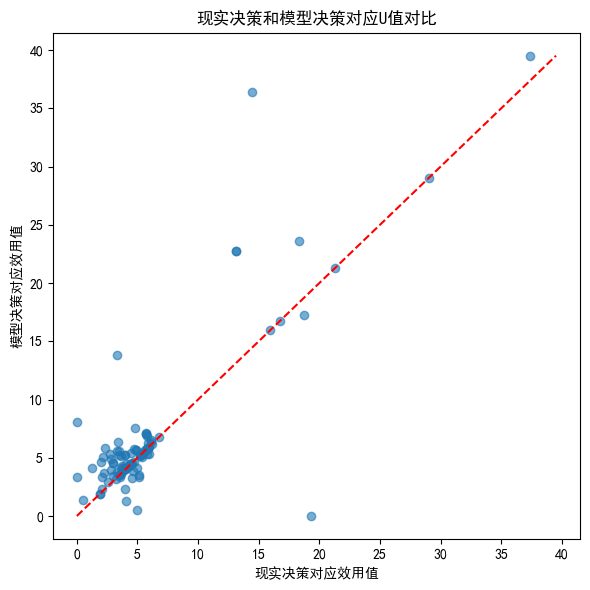

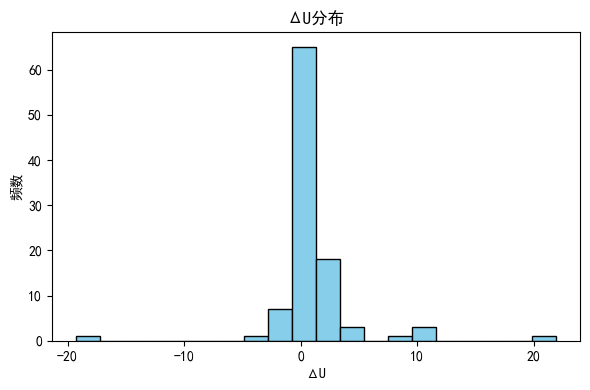

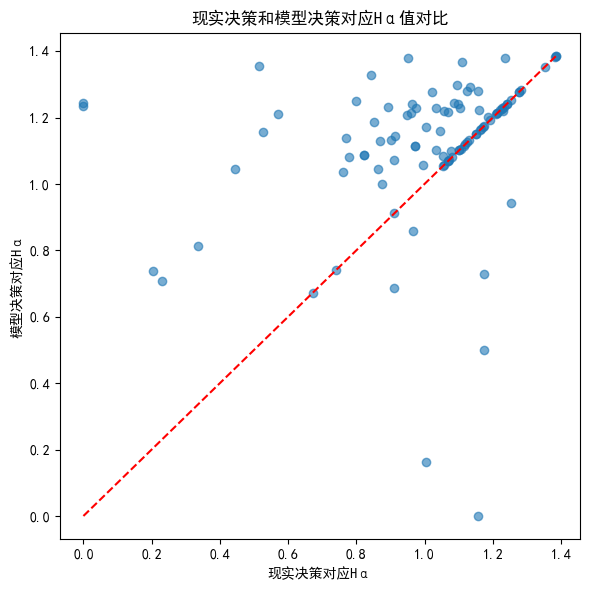

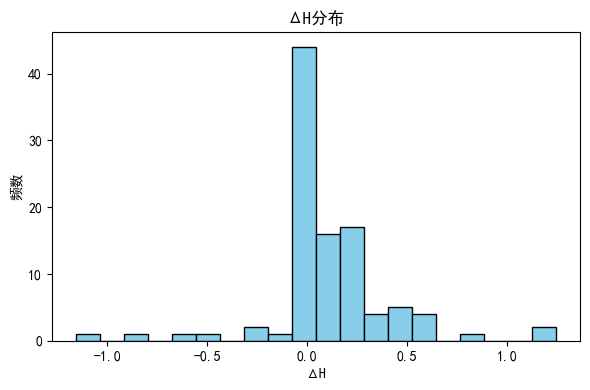

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

def safe_scatter(x, y, title, xlab, ylab):
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, alpha=0.6)
    m = np.nanmin([np.nanmin(x), np.nanmin(y)])
    M = np.nanmax([np.nanmax(x), np.nanmax(y)])
    if np.isfinite(m) and np.isfinite(M):
        plt.plot([m, M], [m, M], color="red", linestyle="--")
    plt.title(title)
    rcParams['font.sans-serif'] = ['SimHei']
    rcParams['axes.unicode_minus'] = False
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.tight_layout()
    plt.show()

def safe_hist(x, bins, title, xlab, ylab):
    plt.figure(figsize=(6,4))
    x = pd.Series(x).dropna()
    plt.hist(x, bins=bins, color="skyblue", edgecolor="black")
    plt.title(title)
    rcParams['font.sans-serif'] = ['SimHei']
    rcParams['axes.unicode_minus'] = False
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.tight_layout()
    plt.show()

# —— U 对比可视化 ——
safe_scatter(
    data3['U_real'], data3['U_model'],
    "现实决策和模型决策对应U值对比", "现实决策对应效用值", "模型决策对应效用值")
safe_hist(
    data3['DeltaU'], 20,
    "ΔU分布", "ΔU", "频数")

# —— H_alpha 对比可视化 ——
safe_scatter(
    data3['H_real'], data3['H_model'],
    "现实决策和模型决策对应Hα值对比", "现实决策对应Hα", "模型决策对应Hα")
safe_hist(
    data3['DeltaH'], 20,
    "ΔH分布", "ΔH", "频数")


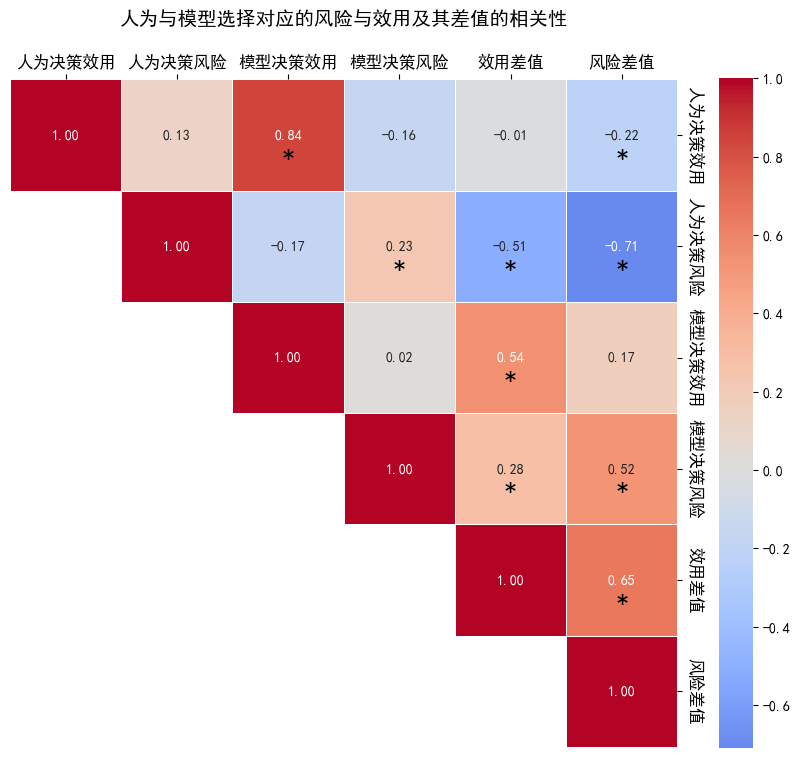

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import rcParams

def corr_heatmap(df, cols, labels=None, title="相关性热力图（Pearson）", alpha=0.05, cmap='coolwarm'):
    work = df.copy()

    work = work[cols].apply(pd.to_numeric, errors='coerce')

    work = work.dropna(subset=cols)

    cor = work.corr(method='pearson')
    pmat = pd.DataFrame(np.nan, index=cols, columns=cols)
    for i, c1 in enumerate(cols):
        for j, c2 in enumerate(cols):
            if i < j:
                r, p = pearsonr(work[c1], work[c2])
                pmat.loc[c1, c2] = p
                pmat.loc[c2, c1] = p
            elif i == j:
                pmat.loc[c1, c2] = np.nan
    sig = pmat.applymap(lambda x: '*' if (pd.notna(x) and x < alpha) else '')

    mask = np.tril(np.ones_like(cor, dtype=bool), k=-1)

    if labels is None:
        labels = cols

    fig, ax = plt.subplots(figsize=(1.2*len(cols)+2, 1.0*len(cols)+2))

    hm = sns.heatmap(
        cor.round(2),
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap=cmap,
        center=0,
        square=True,
        linewidths=0.5,
        linecolor='white',
        cbar_kws={"shrink": 1.0, "location": "right"},
        ax=ax
    )

    rcParams['font.sans-serif'] = ['SimHei']
    rcParams['axes.unicode_minus'] = False
    ax.set_title(title, pad=20, fontsize=14)
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=12)
    ax.set_yticklabels(labels, rotation=-90, va='center', fontsize=12)
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right')

    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if i < j and sig.iloc[i, j] == '*':
                ax.text(j + 0.5, i + 0.7, '*', color='black',
                        ha='center', va='center', fontsize=16)

    plt.tight_layout(pad=3)
    plt.show()

    return cor, pmat, sig

cols_all = ['U_real', 'H_real', 'U_model', 'H_model', 'DeltaU', 'DeltaH']
labels_all = ['人为决策效用', '人为决策风险', '模型决策效用', '模型决策风险', '效用差值', '风险差值']
cor_all, p_all, sig_all = corr_heatmap(
    data3, cols_all, labels=labels_all, title="人为与模型选择对应的风险与效用及其差值的相关性"
)


In [20]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

# 去掉缺失值
df_valid = data3.dropna(subset=['U_real','U_model','H_real','H_model'])

def describe_and_test(x, y, name):
    print(f"\n==== {name} 差异分析 ====")
    # 描述性统计
    mean_x, mean_y = x.mean(), y.mean()
    std_x, std_y   = x.std(), y.std()
    median_x, median_y = x.median(), y.median()
    diff_mean = (x - y).mean()
    
    print("现实选择  平均值={:.3f}, 标准差={:.3f}, 中位数={:.3f}".format(mean_y, std_y, median_y))
    print("模型推荐  平均值={:.3f}, 标准差={:.3f}, 中位数={:.3f}".format(mean_x, std_x, median_x))
    print("差值均值 (模型-现实) = {:.3f}".format(diff_mean))

    # 配对 t 检验
    t_stat, p_t = ttest_rel(x, y)
    print("配对 t 检验: t={:.3f}, p={:.4g}".format(t_stat, p_t))

    # Wilcoxon 检验
    try:
        w_stat, p_w = wilcoxon(x, y)
        print("Wilcoxon 检验: W={:.3f}, p={:.4g}".format(w_stat, p_w))
    except ValueError:
        print("Wilcoxon 检验: 样本条件不满足（可能所有差值为0）")

# 效用 U 分析
describe_and_test(df_valid['U_model'], df_valid['U_real'], "效用 U")

# 风险 H 分析
describe_and_test(df_valid['H_model'], df_valid['H_real'], "风险 H")



==== 效用 U 差异分析 ====
现实选择  平均值=5.862, 标准差=5.615, 中位数=4.521
模型推荐  平均值=6.728, 标准差=6.662, 中位数=5.190
差值均值 (模型-现实) = 0.866
配对 t 检验: t=2.367, p=0.01989
Wilcoxon 检验: W=429.000, p=7.373e-05

==== 风险 H 差异分析 ====
现实选择  平均值=1.003, 标准差=0.272, 中位数=1.071
模型推荐  平均值=1.120, 标准差=0.224, 中位数=1.168
差值均值 (模型-现实) = 0.117
配对 t 检验: t=3.787, p=0.0002614
Wilcoxon 检验: W=316.000, p=2.163e-06
